# RadioWare Lab 5 - Heterodyne Frequency Conversion, Tuning

## Purpose

The purpose of this lab is to fully mature the radio circuits to the point of the heterodyne architecture, involving two stages of up and downconversion.

## Outline

- Add digital IF upconversion at the Tx and downconversion at the Rx.
- Use these measurements to update guidelines on signal levels, range, and frequency separation, ideally showing improvements in dynamic range and resilience to nearby interference.

## Background

As we observed in Lab 4, even when the transmitted baseband signal is OFF, a sinusoidal signal is still present at the receiver ADALM. This is due to the transmitter mixer LO leakage. 

### Mixer LO Leakage

An RF mixer has two input ports and one output port. The ideal mixer would produce an output that is the product of the two inputs. In frequency terms, the output should be at the sum and difference of the input signal frequency and local oscillator (LO) frequency, nothing else. If either input is undriven there will be no output. However, a real-world mixer will also produce some energy at the LO frequency. The energy at LO frequency can be a problem if it is very close to or within the desired output signal and difficult or impossible to remove by filtering, since the filtering would also filter the desired signal. It is this unwanted energy at LO frequency that is referred to as LO Leakage. The local oscillator, which drives the mixer, has leaked to the mixer’s output port. There are also other paths for the LO to leak to the system output.

More details can be found at https://www.analog.com/en/analog-dialogue/articles/transmit-lo-leakage-lol-an-issue-of-zero-if-that-isn-t-making-people-laugh-out-loud.html#

Because the TX mixer LO leakage is still present even when the transmitted baseband signal is OFF, at the receiver end it downconverts to our band of interest which is the sinusoidal signal observed at the receiver ADALM. Since energy detection is utilized, the system performance (BER/FER, etc) is transmitter limited. The TX mixer LO leakage should be dealt with before other improvements are included. Heterodyne architecture is introduced to deal with the leakage issue.

### Heterodyne 

Instead of using a zero Intermediate Frequency (IF) in homodyne, heterodyne uses a nonzero IF. In this way the LO leakage and the desired signal have a separation of IF in the frequency spectrum. This enables filtering of the undesired image band as well as the LO leakage.

## Getting started with heterodyne design

### Our heterodyne system
In our heterodyne transmitter, we will first use an ADALM to upconvert the baseband signal to an IF band and then use a mixer to upconvert the IF to the RF band. We will use a RF BPF (Band Pass Filter) to filter out the LO leakage and the undesired sideband (either upper sideband or lower sideband). 

In our heterodyne receiver, we will use another RF BPF to filter out the image signal which may be caused by interference from other transmitters. Then we use a mixer to downconvert the RF to the IF band. An IF BPF will be included to filter out the sum term of the downconversion mixer and preserve the difference term of the downconversion mixer. Finally, we will use an ADALM to downconvert the IF band to baseband.

The system block diagram is as follows:
<img src="https://ndwireless.github.io/radioware/lab5_31.png" width="80%"> 
The corresponding spectrum at each stage is as follows:
<img src="https://ndwireless.github.io/radioware/lab5_32.png" width="60%"> 
<img src="https://ndwireless.github.io/radioware/lab5_33.png" width="60%"> 

### Exercise 5.1: LO and IF Design; Fine tune the Antennas

#### What we want to do
In this exercise we want to design the value of the IF and LO based on the datasheets for the RF BPF. Then we will further tune the antennas from Lab 3 based on the desired sideband center frequency for your design. 

Note: Before you trim your antennas, ask a TA to verify your design.

#### How to do it
Theoretically, the larger the IF, the further the desired signal (either upper sideband or lower sideband) is away from LO leakage and the undesired sideband. Larger IF makes filtering of the undesired sideband and the LO leakage easier. However, because we use the ADALM to do the first upconversion, the IF is limited by the ADALM. The ADALM has an LPF (Low Pass Filter) with a cutoff frequency of $25$ MHz. Hence the IF can be no greater than $25$ MHz, and generally must be smaller with a larger bit rate. 

We know the image and desired signal are centered at LSB = LO - IF and USB = LO + IF, and the leakage falls in between at LO. If you want to preserve LSB and filter out LO and USB, you need the RF BPF to have a small attenuation (or insertion loss) for  your LSB band and a large attenuation for your LO and USB. If you want to preserve USB and filter out LO and LSB, you need the RF BPF to have a small attenuation for your USB band and a large attenuation for your LO and LSB. The insertion loss of the RF BPF at different bands can be found at: https://www.minicircuits.com/pdfs/ZVBP-2400+.pdf

Jointly design an LO and IF that meets your requirement. If you preserve LSB, trim your antennas to resonate at LSB. If you preserve USB, trim your antenna to resonate at USB. REMEMBER to ask a TA to verify your design BEFORE trimming your antennas!

#### What to include in the lab report
1\. Explain your choice of upper sideband transmission or lower sideband transmission

2\. Fully document and justify your choice of IF, data rate R, and LO.

3\. New FieldFox screenshots of $S_{11}$ for fine tuned antennas.

### Exercise 5.2: Verifing the TX RF BPF performance

#### What we want to do
This exercise verifies that the TX RF BPF filters out the LO leakage and undesired sideband by checking the frequency spectrum before and after the TX RF BPF.

#### How to do it
1\. Make the hardware connections in the following block diagram which is the same as in Lab 4 transmitter. Remember to ensure that all connections are tight.

<img src="https://ndwireless.github.io/radioware/lab5_43.png" width="60%">

2\. Run the ADALM power supply program to generate the designed LO in Exercise 5.1 

Note: You may need to retune the VCO as done in Lab 4 when you tried to generate a 2.4GHz LO in Lab 4 transmitter.

3\. In the TX ADALM program (attached at the end of the writeup file), set $f_0$ as your designed IF in Exercise 5.1; Set a = np.ones(N). Run the TX ADALM program. 

Note: This program has two functions - it generates Vtune as well as the baseband signal. a = np.ones(N) in the program specifies all ones symbols in one packet. That is, the transmitted baseband signal is always ON.

4\. Verify the FieldFox readings and save the screenshot for your report.

5\. Add the RF BPF between the mixer and the FieldFox as in the following block diagram and repeat steps 3 and 4.

<img src="https://ndwireless.github.io/radioware/lab5_44.png" width="60%">

Note: 

|                     Example result                    |                                                                                                                      Interpretation                                                                                                                     |
|:-----------------------------------------------------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|        <img src="https://ndwireless.github.io/radioware/lab5_36.png" width="80%">        | Signal before TX RF BPF.  |
|        <img src="https://ndwireless.github.io/radioware/lab5_37.png" width="80%">        | Signal after TX RF BPF.  |

#### What to include in the lab report
* A FieldFox screenshot (or python plot of captured data) from before the TX RF BPF and after the TX RF BPF
* Interpretation about the heterodyne transmitter frequency spectrum
* Explain anything that you observe that did not meet your expectations based upon your design

### Exercise 5.3: Verifing the RX RF BPF performance

#### What we want to do
This exercise verifies that the RX RF BPF filters out the image signal by checking the frequency spectrum before and after the RX RF BPF.

#### How to do it
1\. Make the hardware connections in the following block diagram. Set the distance between the TX antenna and the RX antenna to be 5cm.

<img src="https://ndwireless.github.io/radioware/lab5_45.png" width="60%">

2\. Repeat steps 2, 3 and 4 in Exercise 5.2.

5\. Add the RF BPF between the RX antenna and the FieldFox as in the following block diagram and repeat step 2.

<img src="https://ndwireless.github.io/radioware/lab5_46.png" width="60%">

Note: 

|                     Example result                    |                                                                                                                      Interpretation                                                                                                                     |
|:-----------------------------------------------------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|        <img src="https://ndwireless.github.io/radioware/lab5_38.png" width="80%">        | Signal before RX RF BPF.  |
|        <img src="https://ndwireless.github.io/radioware/lab5_39.png" width="80%">        | Signal after RX RF BPF.  |

#### What to include in the lab report
* A FieldFox screenshot (or python plot of captured data) from before the RX RF BPF and after the RX RF BPF
* Interpretation about the received signal frequency spectrum
* Explain anything that you observe that did not meet your expectations based upon your design

#### Exercise 5.4: Measuring the power ratio at the receiver with the IF BPF


##### Block diagram

<img src="https://ndwireless.github.io/radioware/lab5_35.png" width="80%">

##### Wiring

<img src="https://ndwireless.github.io/radioware/lab5_42.jpg" width="60%">

##### What we want to do
In this exercise, we measure the power ratio at the Heterodyne receiver ADALM input when the transmitted baseband signal is ON and OFF after adding the IF BPF. 

##### How to do it
1\. Tune RX VCO Vtune to generate a RX LO that is within 1.5 MHz range of the TX LO.

For example, if your TX LO is 2.4GHz, your RX LO should be within 2.3985 - 2.4015 GHz.

2\. Connect all the modules as shown in the following block diagram. Set the distance between the TX antenna and the RX antenna to be 5 cm.

Note: Make sure you connect the TX ADALM first and the RX ADALM second.

3\. In the TX ADALM program (attached at the end of the writeup file), set $f_0$ as your designed IF in Exercise 5.1; Set a = np.ones(N). Run the TX ADALM program. 

Note: a = np.ones(N) in the program specifies all ones symbols in one packet. That is, the transmitted baseband signal is always ON. 

4\. Run the RX ADALM program (attached at the end of the writeup file). This program has two functions: it generates Vtune as well as reads symbols received by the RX ADALM. Then the received signal power is calculated based on the received samples. 

##### Please include the following in your lab report
* The printed received signal power when the baseband signal is always ON. 
* The time domain waveform and magnitude squared of the fft of the received signal when the baseband signal is always ON

5\. In the TX ADALM program (attached at the end of the writeup file), set $f_0$ as your designed IF in Exercise 5.1; Set a = np.zeros(N). Run the TX ADALM program. 

Note: a = np.zeros(N) in the program specifies all zeros symbols in one packet. That is, the transmitted baseband signal is always OFF. 

6\. Run the RX ADALM program (attached at the end of the writeup file) as above. 

##### Please include the following in your lab report
* The printed received signal power when the baseband signal is always OFF. 
* The time domain waveform and magnitude squared of the fft of the received signal when the baseband signal is always OFF.
* Power ratio calculation based on the received signal power measurement:

  Power ratio = Received signal power (when transmitted signal is ON) / Received signal power (when transmitted signal is OFF)

###### Example result:

1\. All ones signal

Note: Below is a table based on the example results and its interpretation. In the program 1000 symbols are captured and only 2 symbols are plotted. In the FFT plot, the y axis is magnitude squared of the fft $20*log_{10}(|X(f)|)$.

<!--As we can observe from the FFT, there are signals at zero frequency (DC offset???) caused by ADALM2000 and the mixer.-->

|                     Example result                    |                                                                                                                      Interpretation                                                                                                                     |
|:-----------------------------------------------------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|        <img src="https://ndwireless.github.io/radioware/lab5_40.png" width="150%">        | Received signal time domain waveform is on the top. <br>The corresponding FFT waveform is at the bottom.  |
|          Signal mean is  0.031679956147840214          |                                                                                                                        DC offset                                                                                                                        |
|    Signal root mean square is  0.008885524975466231    |                                                                                                            Vrms after removing the DC offset                                                                                                            |
|            Signal power is  -34.036638118061454          |                                                                                                                  Measured signal power                                                                                                                  |
| The peak power is at frequency 20865708.65708657 Hz |                                                                                                      The center frequency of the signal                                                   

2\. All zeros signal

|                     Example result                    |
|:-----------------------------------------------------:|
|        <img src="https://ndwireless.github.io/radioware/lab5_41.png" width="100%">        |
|          Signal mean is  0.029400516024659658         |
|    Signal root mean square is  0.0013061249653834258    |
|          Signal power is  -50.69060534312513          |
| The peak power is at frequency 50000000.0 Hz |

3\. Received signal power (transmitted signal ON) / Received signal power (transmitted signal OFF) = 16dB

##### Exercise 5.5: Verify the performance of your IF, LO and symbol rate design (frequency plan)

When ruuning the OOK_transmitter_rf.py and OOK_receiver_rf.py, you could use the optional argument -f0 "enter your designed IF frequency" to set the IF frequency to the desired value and use -o "enter your oversampling factor" to specify the oversampling factor. Note that the symbol rate is given by: Symbol rate (bit rate) = 75 MHz/oversampling factor, where 75 MHz is the sampling rate of the transmitter.

##### What we want to do

In this exercise, we are going to examine the performance of the heterodyne transceiver you designed by measuring its Bit Error Rate (BER).
##### How to do it

Again, set the distance between the transmitter and receiver antennas to be d = 5cm, then run the following commands to measure the BER of your heterodyne transceiver as well as observe the time and frequency domain illustration of the signals in transmission:

Python OOK_transmitter_rf.py -s -f0 "enter your IF frequency here" -o "enter your oversampling factor here" -vtune "enter your transmitter Vtune"

Python OOK_receiver_rf.py -s -f0 "enter your IF frequency here" -o "enter your oversampling factor" -v 100 -vtune "enter your receiver Vtune"

After the programs start running, you may observe significantly less throughput compared with the previous lab. This is largely due to the increased oversampling factor and reduced symbol rate (bit rate) in order to avoid overlapping of the USB and LSB spectrum. 

Try reduce the oversampling factor from your designed value down to 36, 18, 9 and 6 by using the -o "enter your oversampling factor" argument. Observe the variations of BER as well as the time and frequency domain visualizations of the signals. 

Note: Before you run the OOK_transmitter_rf.py and OOK_receiver_rf.py, run the following code to reset both ADALMs. 

##### Please include the following in your lab report
* The BER of your designed heterodyne transceiver at d = 5 cm.
* A screenshot of the time and frequency domain visualizations of the transmitted signals
* BER measured by the heterodyne receiver at oversampling factor = 75, 36, 18, 9, 6 at d = 5 cm

In [ ]:
import libm2k
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.fftpack

#The following script close all the ADALMs
libm2k.contextCloseAll()

uri = libm2k.getAllContexts()
print(uri)

('usb:1.28.5', 'usb:1.29.5')


##### Please include the following in your lab report

* Compare the results from Exercise 4.3 and Exercise 5.4. 

#### Program: TX ADALM2000 (generate Vtune and baseband signal)

In [ ]:
#sample code to set dc voltage when ADALM2000 works as an adjustable power supply and generate baseband signal
import libm2k
import time
import numpy as np

vtune = 3.712
fs = 75e06  # in samples/sec or HZ
Ts = 1.0 / fs  # sampling period in seconds
f0 = 20e06 # intermediate frequency HZ
M = 75  # oversampling factor
T = M * Ts  # symbol period in seconds
R = 1 / T  # symbol rate
N = 10  # length of packet (in symbols)
mag = 0.35 # the magnitude of the OOK signal

uri = libm2k.getAllContexts()
if(len(uri) == 0):
    libm2k.contextCloseAll()

uri=libm2k.getAllContexts()   
sorted_uri = sorted(uri)
if(len(uri)==2):                   
    ctx=libm2k.m2kOpen(sorted_uri[0])
else:
    ctx=libm2k.m2kOpen() 
    
ctx.calibrateDAC()

ps = ctx.getPowerSupply()
ps.enableChannel(0, True)
#Use ADALM2000 to generate VCO Vtune
ps.pushChannel(0, vtune)

aout = ctx.getAnalogOut()
aout.setSampleRate(0, fs)
aout.enableChannel(0, True)

a = np.zeros(N) #all zeros symbols in one period
#a = np.ones(N) #all ones symbols in one period
#a = np.random.randint(2, size = N) # random sequence of ones and zeros in one period
print("a: ", a)
k = np.linspace(0, N * M, N * M)
buffer = mag * np.cos(2 * np.pi * f0 * (k * Ts))
for k in range(N):
        for m in range(M):
                buffer[k * M + m] = a[k] * buffer[k * M + m]

aout.setCyclic(True)
aout.push(0, buffer)

a:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Program: RX ADALM2000 (generate Vtune and read the received signal)

Signal mean is  0.033508744119188374
Signal root mean square is  0.0015194203443302746
Signal power is  -49.37674121448175
The peak power is at frequency 50000000.0 Hz


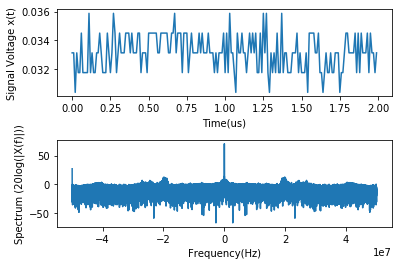

In [ ]:
import libm2k
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.fftpack

#The following script generates Vtune that controls the RX VCO and reads the output signal of the receiver.

M = 100
vtune = 3.705
#open and calibrate ADALM2000
uri = libm2k.getAllContexts()
if(len(uri) == 0):
    libm2k.contextCloseAll()

uri=libm2k.getAllContexts()   
sorted_uri = sorted(uri)
if(len(uri)==2):                   
    ctx=libm2k.m2kOpen(sorted_uri[1])
else:
    ctx=libm2k.m2kOpen() 
ctx.calibrateDAC()
ps = ctx.getPowerSupply()
ps.enableChannel(0, True)
#Use ADALM2000 to generate VCO Vtune
ps.pushChannel(0, vtune)

fs = 100e06
ts = 1/fs
sample_number = M * 1000
t = np.linspace(0, sample_number*ts, sample_number)

ctx.calibrateADC()

ain=ctx.getAnalogIn()
ain.enableChannel(0,True)
ain.enableChannel(1,True)
ain.setSampleRate(fs)  # input sampling rate (Hz) available value: 1000 10000 100000 1000000 10000000 100000000)
ain.setRange(0,-2,2)
ain.setKernelBuffersCount(20)

trig=ain.getTrigger()
trig.setAnalogSource(0) 
trig.setAnalogDelay(0)      # trigger is centered

trig.setAnalogMode(0, libm2k.ALWAYS) #trigger under no condition to get samples of the background noise

background=ain.getSamples(sample_number)[0]
background_sum = sum(background)
maximum_noise = max(background)
background_average= np.mean(background)

print("Signal mean is ", background_average)

centered_background=background - background_average
vrms = np.sqrt(np.mean(np.power(centered_background,2)))
print("Signal root mean square is ", vrms)
print("Signal power is ", 10*np.log10((vrms/2)**2*1000/50))

xf = np.linspace(-fs/2, fs/2, sample_number)
dataf = scipy.fftpack.fftshift(scipy.fftpack.fft(background))
dataf1 = scipy.fftpack.fftshift(scipy.fftpack.fft(centered_background))/sample_number
rxpeakfreq = xf[np.argmax(abs(dataf1))]
print('The peak power is at frequency ' + str(abs(rxpeakfreq)) +' Hz')

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xlabel('Time(us)')
ax1.set_ylabel('Signal Voltage x(t)')
ax1.plot(t[0:M*2]*1e06, background[0:M*2])
ax2.set_xlabel('Frequency(Hz)')
ax2.set_ylabel('Spectrum (20log(|X(f)|))')
ax2.plot(xf, 20*np.log10(abs(dataf)))
plt.subplots_adjust(hspace = 0.5)
plt.savefig('rxsignal.png')
plt.show()